Este notebook está vinculado al caso de estudio "Yapo" (ver el [documento](https://docs.google.com/document/d/1SwhwMOyG7-cmzasDeisQZ_NzX5v2VoZ7--lI4UhJz_U/edit#heading=h.5qaqs0frqkx4) de presentación). Se busca construir una base de datos de anuncios en Los Rios recopilando algunos anuncios de Yapo.cl.

En este notebook, ya tenemos la Base de Datos Yapo construida. Consultamos y visualizamos los datos.

In [30]:
#!pip install pyshp

In [1]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas import DataFrame
import pandas as pd

sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(12,6))

%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

UsageError: Line magic function `%%javascript` not found.


# 3. Consultas SQL

- ¿Cuál es el precio promedio de los anuncios por categoría?

- ¿Cuál es el número de anuncios por vendedor y por día?

- ¿Insertar una columna “Perfil” en la tabla Vendedor. Los Vendedores que publicaron más de 5 anuncios en los últimos 7 días, tienen un perfil “Pro”, los otros se consideran “Personal”.

- ¿Cuál es el precio promedio de los anuncios según el día de la semana (lunes, martes, miercoles, etc.)


In [2]:
import mysql.connector 

db_connection = mysql.connector.connect(user="root",host="localhost",password="root")
cursor = db_connection.cursor()

cursor.execute("use Yapo2")

In [3]:
#¿Cuál es el precio promedio de los anuncios por categoría?

sql = "SELECT categoria, avg(precio) FROM anuncio WHERE moneda=\"$\" GROUP BY categoria ORDER BY avg(precio) DESC;"
cursor.execute(sql)
df1 = DataFrame(cursor.fetchall())
df1.columns = cursor.column_names
df1

,categoria,avg(precio)
0,Vendo - Comercial e industrial,222632000.0000
1,Vendo - Oficina,111333333.3333
2,Vendo - Casa,101286759.7493
3,Vendo - Terreno,64879135.6972
4,Vendo - Departamento,63364095.8938
5,"Buses, camiones y furgones",11299310.3448
6,"Autos, camionetas y 4x4",6434454.9255
7,Otros vehículos,5322276.4894
8,Arriendo - Terreno,4000000.0000
9,"Barcos, lanchas y aviones",3433000.0000


In [6]:
#¿Cuál es el número de anuncios por vendedor?

sql = "SELECT id_vendedor, nombre, count(*) as_nb_anuncios FROM anuncio JOIN vendedor USING (id_vendedor)  GROUP BY id_vendedor, nombre ORDER BY count(*) DESC;"
cursor.execute(sql)
df1 = DataFrame(cursor.fetchall())
df1.columns = cursor.column_names
df1

,id_vendedor,nombre,count(*)
0,Desarmaduria Autorey_Región_La Cisterna,Desarmaduria Autorey,559
1,Carolina fernandez_Región_Santiago,Carolina fernandez,410
2,Alberto ojeda_XII_Punta Arenas,Alberto ojeda,321
3,desarmaduriaterracars_Región_Colina,desarmaduriaterracars,138
4,Ceballos & Jopia Gestión Inmobiliaria SpA_V_Vi...,Ceballos & Jopia Gestión Inmobiliaria SpA,102
5,Disquería Vinilos Copiapó_III_Copiapó,Disquería Vinilos Copiapó,88
6,Sebastián Montes_Región_Las Condes,Sebastián Montes,87
7,print ink chile_Región_Macul,print ink chile,76
8,Malux_IV_La Serena,Malux,75
9,Marcelo Navarro Quilodran_Región_Maipú,Marcelo Navarro Quilodran,73


In [7]:
#¿Cuál es el precio promedio de los anuncios según el día de la semana (lunes, martes, miercoles, etc.), por categoria?
sql = "select DAYOFWEEK(fecha_publicacion) as dia,categoria, avg(precio) from anuncio where moneda=\"$\" group by dia, categoria order by avg(precio) desc;"
cursor.execute(sql)
df1 = DataFrame(cursor.fetchall())
df1.columns = cursor.column_names
df1

,dia,categoria,avg(precio)
0,3,Vendo - Comercial e industrial,260790000.0000
1,4,Vendo - Oficina,180000000.0000
2,3,Vendo - Casa,104975976.9018
3,4,Vendo - Terreno,93943243.2432
4,4,Vendo - Casa,81012389.3805
5,3,Vendo - Oficina,77000000.0000
6,4,Vendo - Comercial e industrial,70000000.0000
7,3,Vendo - Departamento,65522040.5714
8,3,Vendo - Terreno,59854032.9907
9,4,Vendo - Departamento,55959383.7647


### Insertar una columna “Perfil” en la tabla Vendedor. Los Vendedores que publicaron más de 5 anuncios en el último día, tienen un perfil “Pro”, los otros se consideran “Personal”.


In [9]:
#Modificamos la estructura de la tabla "vendedor"

sql = "ALTER TABLE vendedor ADD perfil VARCHAR(10);"
cursor.execute(sql)

In [12]:
#Pongamos un valor por defecto en la column "perfil"

sql = "UPDATE vendedor SET perfil=\"Personal\";"
cursor.execute(sql)
cursor.execute("COMMIT")

In [21]:
#Actualizamos la columna "perfil" para los vendedores que publicaron más de 5 anuncios en el último día


sql = "SELECT id_vendedor FROM anuncio JOIN vendedor USING (id_vendedor)  GROUP BY id_vendedor HAVING count(*) >= 5 ORDER BY count(*) DESC;"
cursor.execute(sql)
df1 = DataFrame(cursor.fetchall())
df1.columns = cursor.column_names
#print(df1[:5])

for index,row in df1.iterrows():
    id_vendedor=row[0]
    
    sql = "UPDATE vendedor SET perfil=\"Pro\" WHERE id_vendedor=\""+id_vendedor+"\";"
    cursor.execute(sql)

cursor.execute("COMMIT")
    

In [22]:
#¿Cuál es el número de vendedores por tipo de perfil?
sql = "SELECT perfil, count(*) as vendedores FROM vendedor GROUP BY perfil;"
cursor.execute(sql)
df1 = DataFrame(cursor.fetchall())
df1.columns = cursor.column_names
df1

,perfil,vendedores
0,Personal,6813
1,Pro,1044


# 4. Visualizaciones de datos en un mapa

## 4.1 Shapefile

In [80]:
shp_path = "./cl_regiones_geo/cl_regiones_geo.shp"
sf = shp.Reader(shp_path, encoding="ISO8859-1")

In [81]:
len(sf.shapes())

15

In [82]:
sf.records()[2]

Record #2: ['02', 'Antofagasta']

In [83]:
sf.records()[1][1]

'Tarapaca'

In [84]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [33]:
df = read_shapefile(sf)
df.shape

(15, 3)

In [34]:
df.sample(15)

,ID_2002,NOMBRE,coords
7,06,Libertador Gral. Bernardo O'Higgins,"[(-70.03126, -34.28848), (-70.031713, -34.2923..."
8,07,Maule,"[(-70.363785, -35.003876), (-70.364762, -35.00..."
14,12,Magallanes y de la Antartica Chileno,"[(-74.704448, -50.202635), (-74.704448, -50.20..."
4,04,Coquimbo,"[(-69.952308, -29.503367), (-69.951567, -29.50..."
1,01,Tarapaca,"[(-70.286169, -19.228974), (-70.130959, -19.15..."
13,11,Aisen del Gral. Carlos Ibañez del Campo,"[(-72.737018, -43.829555), (-72.738551, -43.82..."
10,09,La Araucania,"[(-71.044287, -38.123172), (-71.029341, -38.13..."
0,15,Arica y Parinacota,"[(-70.266233, -19.190222), (-70.27196, -19.188..."
6,13,Metropolitana de Santiago,"[(-70.24362, -33.187388), (-70.242295, -33.184..."
11,14,Los Rios,"[(-71.967833, -40.63312), (-71.971205, -40.634..."


In [35]:
df[df.NOMBRE == 'Los Rios']

,ID_2002,NOMBRE,coords
11,14,Los Rios,"[(-71.967833, -40.63312), (-71.971205, -40.634..."


## 4.2 Visualizar el mapa (funciones útiles)

Tutorial y fuente del código: https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f

In [70]:
def calc_color(data, color=None):
        if color   == 1: 
            color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0',
                        '#807dbaF0','#6a51a3F0','#54278fF0']; 
            colors = 'Purples';
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3: 
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525']; 
            colors = 'Greys';
        elif color == 9: 
            color_sq = ['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000']
        else:            
            color_sq = ['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
        
        new_data, bins = pd.qcut(data, 6, retbins=True, labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [71]:
def plot_regiones_data(sf, title, regiones, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    region_id = []
    for i in regiones:
        #print(i)
        id = df[df.NOMBRE == i].index.get_values()[0]
        region_id.append(id)
        
        
    y_lim = (-41,-17) # latitude 
    x_lim = (-76, -66) # longitude
    
    plot_map_fill_multiples_ids_tone(sf, title, region_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = x_lim, 
                                     y_lim = y_lim, 
                                     figsize = (10,25));

In [72]:
def plot_map_fill_multiples_ids_tone(sf, title, comuna,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (5,12)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

## 4.3 Visualizar datos de Yapo en un mapa

In [55]:
from pandas import DataFrame
#¿Cuál es el número de anuncios Yapo.cl en cada región de Chile ?

sql = "select nombre_region, count(*) as nb_anuncios from vendedor join anuncio using (id_vendedor) where nombre_region != \"Ñuble\" group by nombre_region order by nb_anuncios DESC;"
cursor.execute(sql)
df1 = DataFrame(cursor.fetchall())
df1.columns = cursor.column_names
df1

,nombre_region,nb_anuncios
0,Metropolitana,29
1,Magallanes & Antártica,7
2,Biobío,5
3,O'Higgins,3
4,Valparaíso,2
5,Los Ríos,2
6,Coquimbo,1
7,Tarapacá,1


In [56]:
read_shapefile(sf).head(15)

,ID_2002,NOMBRE,coords
0,15,Arica y Parinacota,"[(-70.266233, -19.190222), (-70.27196, -19.188..."
1,01,Tarapaca,"[(-70.286169, -19.228974), (-70.130959, -19.15..."
2,02,Antofagasta,"[(-68.481222, -20.945989), (-68.480813, -20.94..."
3,03,Atacama,"[(-68.544889, -25.298825), (-68.543865, -25.31..."
4,04,Coquimbo,"[(-69.952308, -29.503367), (-69.951567, -29.50..."
5,05,Valparaiso,"[(-70.319802, -32.274733), (-70.314426, -32.27..."
6,13,Metropolitana de Santiago,"[(-70.24362, -33.187388), (-70.242295, -33.184..."
7,06,Libertador Gral. Bernardo O'Higgins,"[(-70.03126, -34.28848), (-70.031713, -34.2923..."
8,07,Maule,"[(-70.363785, -35.003876), (-70.364762, -35.00..."
9,08,Biobio,"[(-73.684488, -37.367238), (-73.684134, -37.36..."


In [57]:
df1.loc[df1.nombre_region == "Metropolitana", "nombre_region"] = "Metropolitana de Santiago"
df1.loc[df1.nombre_region == "Valparaíso", "nombre_region"] = "Valparaiso"
df1.loc[df1.nombre_region == "Biobío", "nombre_region"] = "Biobio"
df1.loc[df1.nombre_region == "Magallanes & Antártica", "nombre_region"] = "Magallanes y de la Antartica Chileno"
df1.loc[df1.nombre_region == "Araucanía", "nombre_region"] = "La Araucania"
df1.loc[df1.nombre_region == "O'Higgins", "nombre_region"] = "Libertador Gral. Bernardo O'Higgins"
df1.loc[df1.nombre_region == "Los Ríos", "nombre_region"] = "Los Rios"
df1.loc[df1.nombre_region == "Tarapacá", "nombre_region"] = "Tarapaca"
df1.loc[df1.nombre_region == "Aisén", "nombre_region"] = "Aisen del Gral. Carlos Ibañez del Campo"
df1.loc[df1.nombre_region == "Arica & Parinacota", "nombre_region"] = "Arica y Parinacota"

In [64]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>


1: 1 => 0 
2: 1 => 1 
3: 2 => 1 
4: 2 => 3 
5: 4 => 5 
6: 6 => 28 

   1   2   3   4   5   6


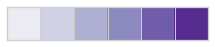

<Figure size 720x1800 with 0 Axes>

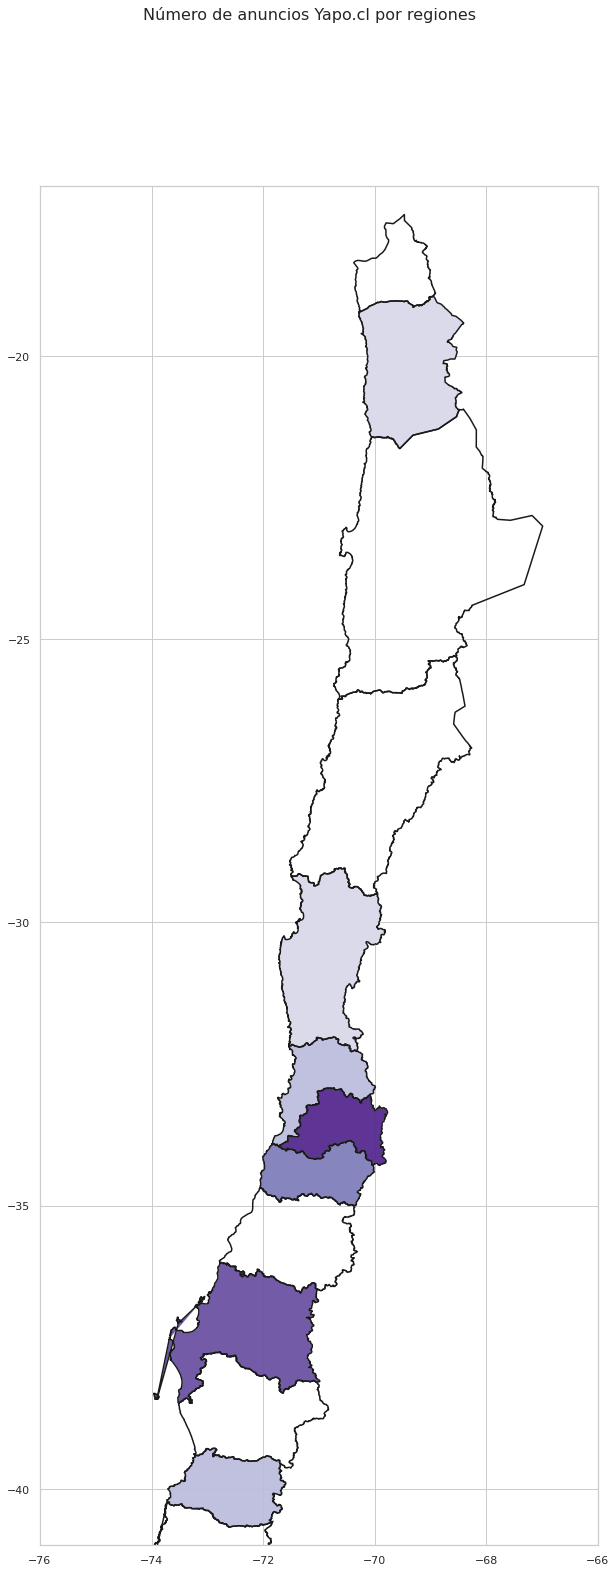

In [65]:
data = df1.nb_anuncios
regiones = df1.nombre_region

print_id = False # The shape id will be printed
color_pallete = 1 # 'Purples'
plot_regiones_data(sf, 'Número de anuncios Yapo.cl por regiones', regiones, data, color_pallete, print_id)

# 5. Visualización de datos en gráficos

Implementar un script Python para visualizar la distribución de los precios en la categoría “Arriendo - Departamento”.

In [60]:
pd.options.display.max_colwidth = 300

sql = "select url,titulo,precio from anuncio where moneda = \"$\" and categoria = \"Arriendo - Departamento\" order by precio DESC;"
cursor.execute(sql)
df1 = DataFrame(cursor.fetchall())
df1.columns = cursor.column_names
df1[:20]

,url,titulo,precio
0,https://www.yapo.cl/valparaiso/arrendar/ceballos_jopia_vt1128_departamento_villa_alemana_73220955.htm?ca=6_s&oa=73220955&xsp=29,Ceballos&Jopia VT1128 Departamento Villa Alemana,57990000
1,https://www.yapo.cl/valparaiso/arrendar/ceballos_jopia_vt1128_departamento_villa_alemana_73220955.htm?ca=6_s&oa=73220955&xsp=34,Ceballos&Jopia VT1128 Departamento Villa Alemana,57990000
2,https://www.yapo.cl/valparaiso/arrendar/ceballos_jopia_vt1128_departamento_villa_alemana_73220955.htm?ca=6_s&oa=73220955&xsp=4,Ceballos&Jopia VT1128 Departamento Villa Alemana,57990000
3,https://www.yapo.cl/valparaiso/arrendar/ceballos_jopia_vt1128_departamento_villa_alemana_73220955.htm?ca=6_s&oa=73220955&xsp=7,Ceballos&Jopia VT1128 Departamento Villa Alemana,57990000
4,https://www.yapo.cl/region_metropolitana/arrendar/busco_departamento_73723075.htm?ca=15_s&oa=73723075&xsp=26,Busco Departamento,2500000
5,https://www.yapo.cl/region_metropolitana/arrendar/busco_departamento_73723075.htm?ca=15_s&oa=73723075&xsp=31,Busco Departamento,2500000
6,https://www.yapo.cl/region_metropolitana/arrendar/busco_departamento_73723075.htm?ca=15_s&oa=73723075&xsp=6,Busco Departamento,2500000
7,https://www.yapo.cl/region_metropolitana/arrendar/busco_departamento_73723075.htm?ca=15_s&oa=73723075&xsp=7,Busco Departamento,2500000
8,https://www.yapo.cl/region_metropolitana/arrendar/busco_departamento_73723075.htm?ca=15_s&oa=73723075&xsp=9,Busco Departamento,2500000
9,https://www.yapo.cl/region_metropolitana/arrendar/espectacular_depto_tipo_loft_en_plaza_brasil_73857644.htm?ca=15_s&oa=73857644&xsp=12,Espectacular depto tipo loft en plaza brasil,1350000


Filtramos los 9 primeros valores que no son relevantes y guardamos los valores en un objeto "array":

In [57]:
x = df1[9:]["precio"].to_numpy() 

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(color_codes=True)

(0.0, 1400000.0)

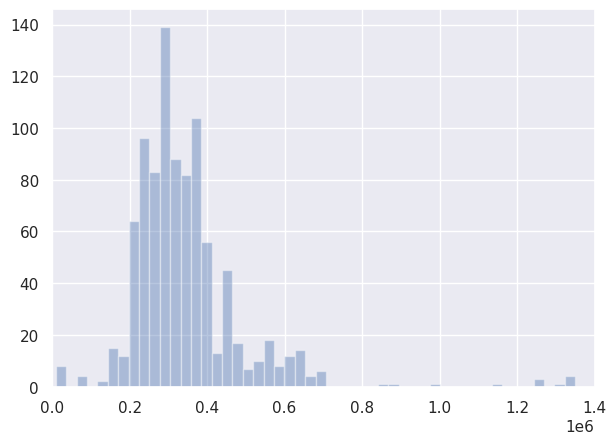

In [58]:
fig, ax = plt.subplots()
sns.distplot(x, kde=False, norm_hist=False)
ax.set_xlim(0,1400000)

La mayoría de los arriendos de Departamento cuestan entre 200.000 y 400.000 pesos.

### ¿Cuál es el precio promedio de los arriendos de Departamento en cada región?

In [66]:
sql = "select nombre_region, avg(precio) as precio_prom from vendedor join anuncio using (id_vendedor) where categoria=\"Arriendo - Departamento\" and moneda=\"$\" and nombre_region != \"Ñuble\" and precio < 1500000 group by nombre_region order by precio_prom DESC;"
print(sql)
cursor.execute(sql)
df1 = DataFrame(cursor.fetchall())
df1.columns = cursor.column_names
df1

select nombre_region, avg(precio) as precio_prom from vendedor join anuncio using (id_vendedor) where categoria="Arriendo - Departamento" and moneda="$" and nombre_region != "Ñuble" and precio < 1500000 group by nombre_region order by precio_prom DESC;


,nombre_region,precio_prom
0,Antofagasta,493636.3636
1,Tarapacá,465818.1818
2,Arica & Parinacota,392727.2727
3,Metropolitana,359303.5714
4,Los Ríos,340909.0909
5,Valparaíso,331861.7021
6,Magallanes & Antártica,326000.0000
7,Atacama,320000.0000
8,Coquimbo,307058.8235
9,Biobío,292348.4848


In [78]:
df1["precio_prom"] = df1["precio_prom"].astype(int)
df1

,nombre_region,precio_prom
0,Antofagasta,493636
1,Tarapaca,465818
2,Arica y Parinacota,392727
3,Metropolitana de Santiago,359303
4,Los Rios,340909
5,Valparaiso,331861
6,Magallanes y de la Antartica Chileno,326000
7,Atacama,320000
8,Coquimbo,307058
9,Biobio,292348


In [67]:
df1.loc[df1.nombre_region == "Metropolitana", "nombre_region"] = "Metropolitana de Santiago"
df1.loc[df1.nombre_region == "Valparaíso", "nombre_region"] = "Valparaiso"
df1.loc[df1.nombre_region == "Biobío", "nombre_region"] = "Biobio"
df1.loc[df1.nombre_region == "Magallanes & Antártica", "nombre_region"] = "Magallanes y de la Antartica Chileno"
df1.loc[df1.nombre_region == "Araucanía", "nombre_region"] = "La Araucania"
df1.loc[df1.nombre_region == "O'Higgins", "nombre_region"] = "Libertador Gral. Bernardo O'Higgins"
df1.loc[df1.nombre_region == "Los Ríos", "nombre_region"] = "Los Rios"
df1.loc[df1.nombre_region == "Tarapacá", "nombre_region"] = "Tarapaca"
df1.loc[df1.nombre_region == "Aisén", "nombre_region"] = "Aisen del Gral. Carlos Ibañez del Campo"
df1.loc[df1.nombre_region == "Arica & Parinacota", "nombre_region"] = "Arica y Parinacota"


1: 195000 => 260332 
2: 260333 => 292278 
3: 292279 => 319999 
4: 320000 => 334876 
5: 334877 => 381584 
6: 381585 => 493635 

   1   2   3   4   5   6


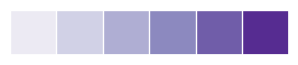

<Figure size 1000x2500 with 0 Axes>

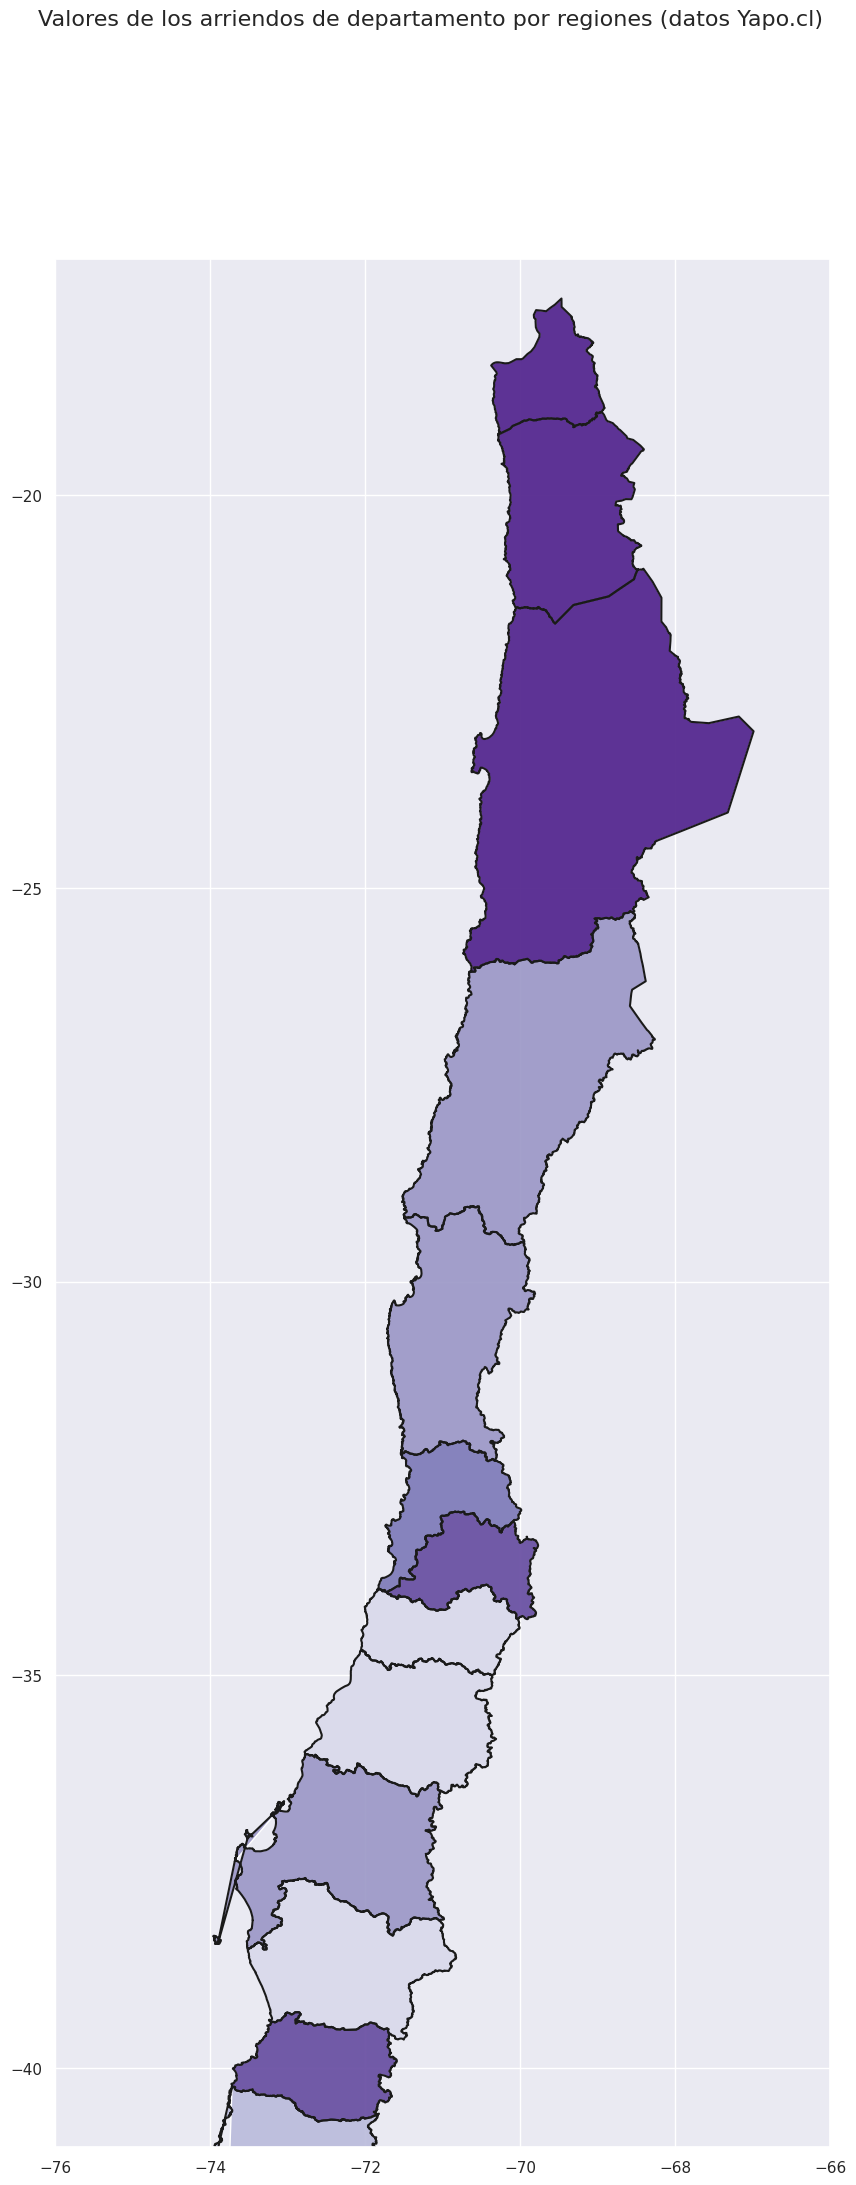

In [85]:
data = df1.precio_prom
regiones = df1.nombre_region

print_id = False # The shape id will be printed
color_pallete = 1 # 'Purples'
plot_regiones_data(sf, 'Valores de los arriendos de departamento por regiones (datos Yapo.cl)', regiones, data, color_pallete, print_id)

In [89]:
#!pip install descartes

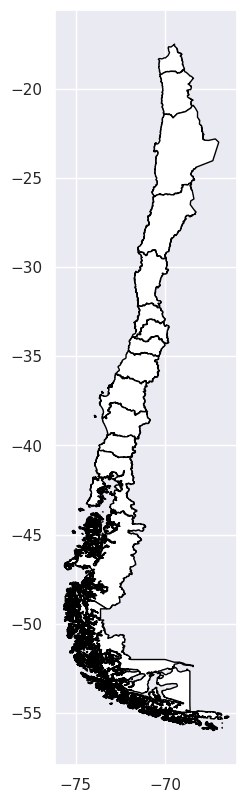

In [98]:
import geopandas as gpd
df_geo = gpd.read_file(shp_path)
fig, ax = plt.subplots(figsize=(10,10))
df.plot(ax=ax,color='white', edgecolor='black')
ax.set_aspect('equal')
plt.show()

In [99]:
df_geo

,ID_2002,NOMBRE,geometry
0,15,Arica y Parinacota,"POLYGON ((-70.26623 -19.19022, -70.27196 -19.18892, -70.27457 -19.18345, -70.27760 -19.17672, -70.27403 -19.17129, -70.27533 -19.16751, -70.27352 -19.16249, -70.27084 -19.15789, -70.27079 -19.15119, -70.26988 -19.14784, -70.26985 -19.14364, -70.27904 -19.13351, -70.27900 -19.12890, -70.28513 -19..."
1,01,Tarapaca,"POLYGON ((-70.28617 -19.22897, -70.13096 -19.15446, -70.09897 -19.11888, -70.00240 -19.08001, -69.99822 -19.07553, -69.98297 -19.06716, -69.98058 -19.06447, -69.97789 -19.06327, -69.97519 -19.06536, -69.96353 -19.05969, -69.95636 -19.05341, -69.95217 -19.05042, -69.94560 -19.04892, -69.94111 -19..."
2,02,Antofagasta,"POLYGON ((-68.48122 -20.94599, -68.48081 -20.94435, -68.48143 -20.94149, -68.47836 -20.94087, -68.47651 -20.94435, -68.47447 -20.94681, -68.46546 -20.94599, -68.46014 -20.94415, -68.45461 -20.94578, -68.45236 -20.94578, -68.44867 -20.94681, -68.44581 -20.94496, -68.44151 -20.94558, -68.43885 -20..."
3,03,Atacama,"POLYGON ((-68.54489 -25.29883, -68.54386 -25.31049, -68.54530 -25.31193, -68.54427 -25.31459, -68.53731 -25.31971, -68.53527 -25.32175, -68.53383 -25.31950, -68.53035 -25.31950, -68.52462 -25.32646, -68.52176 -25.32830, -68.52114 -25.33363, -68.52114 -25.33792, -68.51909 -25.34018, -68.51889 -25..."
4,04,Coquimbo,"POLYGON ((-69.95231 -29.50337, -69.95157 -29.50454, -69.94912 -29.50698, -69.94815 -29.50943, -69.94815 -29.51065, -69.94717 -29.51163, -69.94692 -29.51383, -69.94741 -29.51505, -69.94717 -29.51945, -69.95010 -29.51994, -69.95108 -29.52140, -69.94912 -29.52336, -69.94888 -29.52580, -69.94961 -29..."
5,05,Valparaiso,"POLYGON ((-70.31980 -32.27473, -70.31443 -32.27449, -70.31320 -32.27449, -70.30710 -32.27669, -70.30294 -32.27644, -70.29805 -32.27742, -70.29488 -32.28157, -70.29341 -32.28377, -70.29390 -32.28671, -70.29121 -32.28817, -70.28779 -32.29013, -70.28584 -32.29208, -70.28193 -32.29330, -70.27582 -32..."
6,13,Metropolitana de Santiago,"POLYGON ((-70.24362 -33.18739, -70.24229 -33.18418, -70.24010 -33.17989, -70.23790 -33.17489, -70.23956 -33.17165, -70.23992 -33.16699, -70.23816 -33.16342, -70.23558 -33.16129, -70.23171 -33.15918, -70.22955 -33.15705, -70.22646 -33.14955, -70.22897 -33.14630, -70.23151 -33.14448, -70.23446 -33..."
7,06,Libertador Gral. Bernardo O'Higgins,"POLYGON ((-70.03126 -34.28848, -70.03171 -34.29233, -70.03025 -34.29624, -70.02854 -34.30015, -70.02169 -34.30797, -70.02218 -34.31066, -70.02121 -34.31603, -70.01779 -34.32483, -70.01876 -34.32727, -70.01583 -34.33118, -70.01436 -34.33973, -70.01730 -34.34218, -70.01827 -34.34560, -70.01950 -34..."
8,07,Maule,"POLYGON ((-70.36378 -35.00388, -70.36476 -35.00681, -70.36452 -35.00999, -70.36672 -35.01267, -70.36598 -35.01634, -70.36623 -35.01829, -70.36305 -35.01951, -70.36036 -35.02685, -70.36281 -35.03124, -70.36061 -35.03466, -70.36696 -35.03613, -70.37307 -35.04077, -70.37331 -35.04322, -70.37576 -35..."
9,08,Biobio,"MULTIPOLYGON (((-73.68449 -37.36724, -73.68413 -37.36630, -73.68358 -37.36530, -73.68225 -37.36463, -73.68141 -37.36388, -73.68129 -37.36341, -73.68185 -37.36299, -73.68153 -37.36261, -73.68103 -37.36255, -73.68015 -37.36258, -73.67962 -37.36205, -73.67938 -37.36142, -73.67933 -37.36055, -73.678..."


In [100]:
df1

,nombre_region,precio_prom
0,Antofagasta,493636
1,Tarapaca,465818
2,Arica y Parinacota,392727
3,Metropolitana de Santiago,359303
4,Los Rios,340909
5,Valparaiso,331861
6,Magallanes y de la Antartica Chileno,326000
7,Atacama,320000
8,Coquimbo,307058
9,Biobio,292348


In [102]:
result = pd.concat([df_geo.set_index("NOMBRE"), df1.set_index("nombre_region")], axis=1, join='inner')
result

,ID_2002,geometry,precio_prom
Arica y Parinacota,15,"POLYGON ((-70.26623 -19.19022, -70.27196 -19.18892, -70.27457 -19.18345, -70.27760 -19.17672, -70.27403 -19.17129, -70.27533 -19.16751, -70.27352 -19.16249, -70.27084 -19.15789, -70.27079 -19.15119, -70.26988 -19.14784, -70.26985 -19.14364, -70.27904 -19.13351, -70.27900 -19.12890, -70.28513 -19...",392727
Tarapaca,01,"POLYGON ((-70.28617 -19.22897, -70.13096 -19.15446, -70.09897 -19.11888, -70.00240 -19.08001, -69.99822 -19.07553, -69.98297 -19.06716, -69.98058 -19.06447, -69.97789 -19.06327, -69.97519 -19.06536, -69.96353 -19.05969, -69.95636 -19.05341, -69.95217 -19.05042, -69.94560 -19.04892, -69.94111 -19...",465818
Antofagasta,02,"POLYGON ((-68.48122 -20.94599, -68.48081 -20.94435, -68.48143 -20.94149, -68.47836 -20.94087, -68.47651 -20.94435, -68.47447 -20.94681, -68.46546 -20.94599, -68.46014 -20.94415, -68.45461 -20.94578, -68.45236 -20.94578, -68.44867 -20.94681, -68.44581 -20.94496, -68.44151 -20.94558, -68.43885 -20...",493636
Atacama,03,"POLYGON ((-68.54489 -25.29883, -68.54386 -25.31049, -68.54530 -25.31193, -68.54427 -25.31459, -68.53731 -25.31971, -68.53527 -25.32175, -68.53383 -25.31950, -68.53035 -25.31950, -68.52462 -25.32646, -68.52176 -25.32830, -68.52114 -25.33363, -68.52114 -25.33792, -68.51909 -25.34018, -68.51889 -25...",320000
Coquimbo,04,"POLYGON ((-69.95231 -29.50337, -69.95157 -29.50454, -69.94912 -29.50698, -69.94815 -29.50943, -69.94815 -29.51065, -69.94717 -29.51163, -69.94692 -29.51383, -69.94741 -29.51505, -69.94717 -29.51945, -69.95010 -29.51994, -69.95108 -29.52140, -69.94912 -29.52336, -69.94888 -29.52580, -69.94961 -29...",307058
Valparaiso,05,"POLYGON ((-70.31980 -32.27473, -70.31443 -32.27449, -70.31320 -32.27449, -70.30710 -32.27669, -70.30294 -32.27644, -70.29805 -32.27742, -70.29488 -32.28157, -70.29341 -32.28377, -70.29390 -32.28671, -70.29121 -32.28817, -70.28779 -32.29013, -70.28584 -32.29208, -70.28193 -32.29330, -70.27582 -32...",331861
Metropolitana de Santiago,13,"POLYGON ((-70.24362 -33.18739, -70.24229 -33.18418, -70.24010 -33.17989, -70.23790 -33.17489, -70.23956 -33.17165, -70.23992 -33.16699, -70.23816 -33.16342, -70.23558 -33.16129, -70.23171 -33.15918, -70.22955 -33.15705, -70.22646 -33.14955, -70.22897 -33.14630, -70.23151 -33.14448, -70.23446 -33...",359303
Libertador Gral. Bernardo O'Higgins,06,"POLYGON ((-70.03126 -34.28848, -70.03171 -34.29233, -70.03025 -34.29624, -70.02854 -34.30015, -70.02169 -34.30797, -70.02218 -34.31066, -70.02121 -34.31603, -70.01779 -34.32483, -70.01876 -34.32727, -70.01583 -34.33118, -70.01436 -34.33973, -70.01730 -34.34218, -70.01827 -34.34560, -70.01950 -34...",197777
Maule,07,"POLYGON ((-70.36378 -35.00388, -70.36476 -35.00681, -70.36452 -35.00999, -70.36672 -35.01267, -70.36598 -35.01634, -70.36623 -35.01829, -70.36305 -35.01951, -70.36036 -35.02685, -70.36281 -35.03124, -70.36061 -35.03466, -70.36696 -35.03613, -70.37307 -35.04077, -70.37331 -35.04322, -70.37576 -35...",195000
Biobio,08,"MULTIPOLYGON (((-73.68449 -37.36724, -73.68413 -37.36630, -73.68358 -37.36530, -73.68225 -37.36463, -73.68141 -37.36388, -73.68129 -37.36341, -73.68185 -37.36299, -73.68153 -37.36261, -73.68103 -37.36255, -73.68015 -37.36258, -73.67962 -37.36205, -73.67938 -37.36142, -73.67933 -37.36055, -73.678...",292348


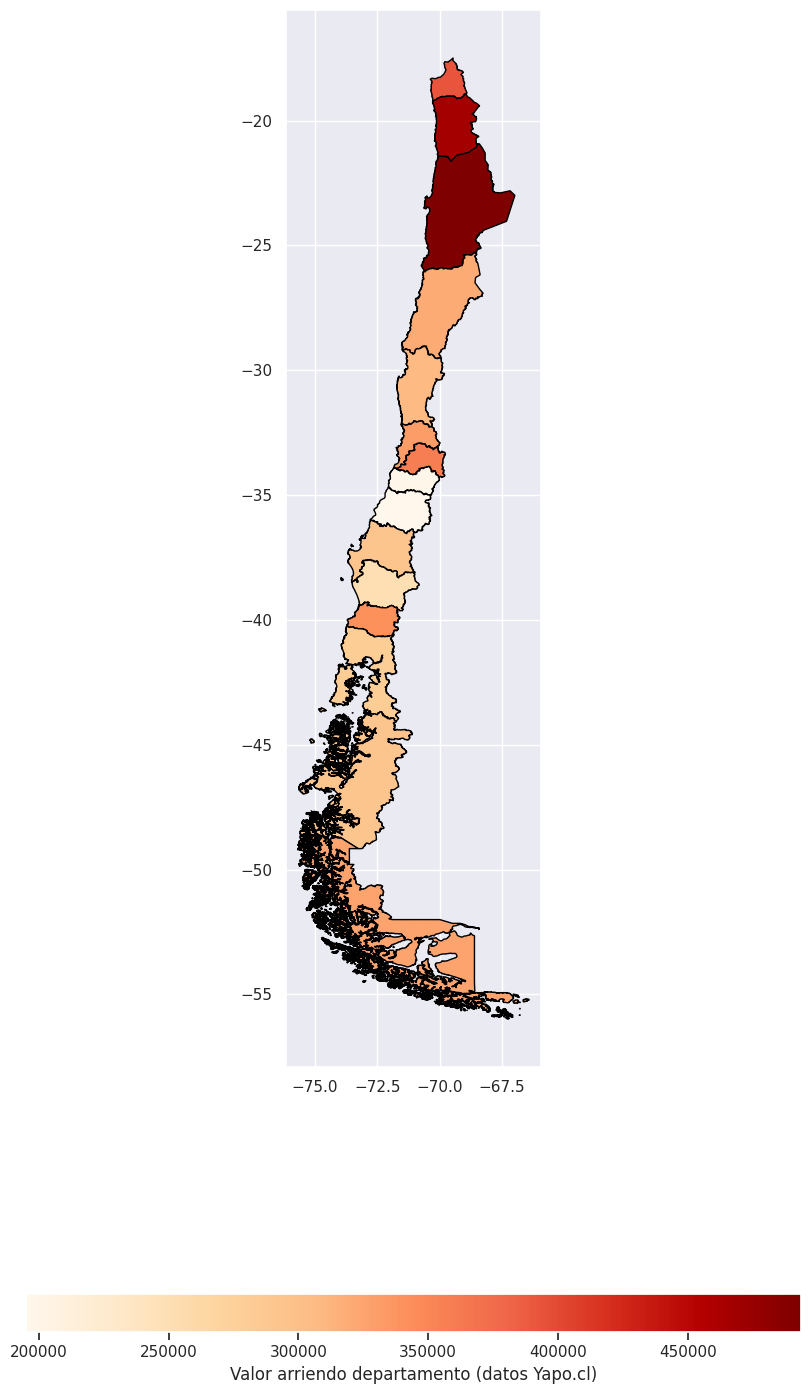

In [113]:
import geopandas as gpd
#df_geo = gpd.read_file(shp_path)
fig, ax = plt.subplots(figsize=(10,20))
result.plot(ax=ax,edgecolor='black',column='precio_prom', cmap='OrRd',legend=True,
        legend_kwds={'label': "Valor arriendo departamento (datos Yapo.cl)",'orientation': "horizontal"})
ax.set_aspect('equal')
plt.show()